# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Are you excited to dive into data work for an exciting project at The Recording Academy? You know, the non-profit organization behind the Grammy Awards!

In this project, you'll work on real data from both websites owned by The Recording Academy, the non-profit organization behind the famous Grammy Awards. As you just learned, Ray Starck, the VP of Digital Strategy, decided to split the websites into grammy.com and recordingacademy.com to better serve the Recording Academy's various audience needs.

Now, you are tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_df`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy`

**C.** Preview the dataframes to familiarize yourself with the data.

All files needed can be found in the `datasets` folder.

In [5]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')


In [7]:
# preview full_df dataframe
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [9]:
# preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_df`. See if you can spot the days the Grammys awards are hosted.

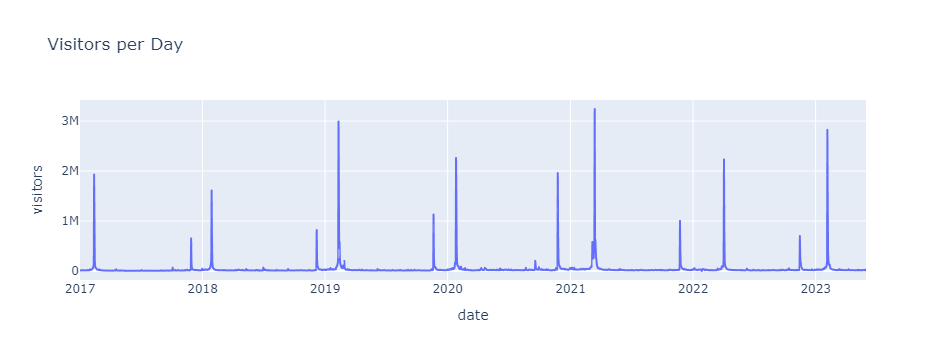

In [11]:
# Plot a line chart of the visitors on the site.
px.line(data_frame=full_df, x="date",y="visitors", title="Visitors per Day")

<span style='background :#FFF59E'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

The website seems to have a regular visitor count of 9,000 to 30,000 on non-award days/weeks. The award days and nomination days get hundreds of thousands to millions of visitors on those dates.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [16]:
full_df.groupby("awards_night").agg({'visitors':'mean'})

,visitors
awards_night,
0,32388.28
1,1389590.23


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

The ratio between the award nights and non-award nights is 43:1. Meaning that for every user that visits the site on a normal day, forty-three people visit the site on an award night. 

<span style='background :#FFF59E'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [20]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df['date'] > '2021-01-31']

In [21]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [22]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

<span style='background :#DDD5F3'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has the `combined_site`, `rec_academy`, and `grammys` dataframes as entries. e.g. If the 3 dataframes were `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

In [23]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background :#FFF59E'>**Hint:** Divide the `pageviews` by `sessions`</span>

This can be achieved by using the following template:

```python
for frame in frames:
    frame['new_col'] = frame['col_A'] / frame['col_B']
```

In [24]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

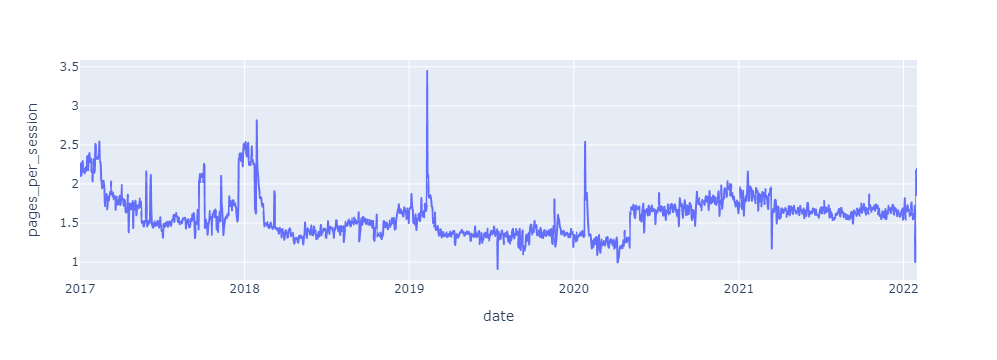

In [25]:
# combined_site graph
px.line(data_frame=combined_site, x='date', y='pages_per_session', title='Combined Site Pages per Session')

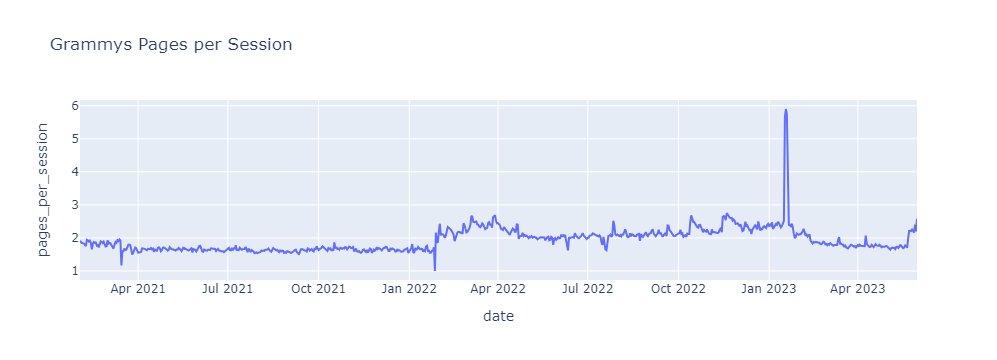

In [27]:
# grammys graph
px.line(data_frame=grammys, x='date', y='pages_per_session', title='Grammys Pages per Session')

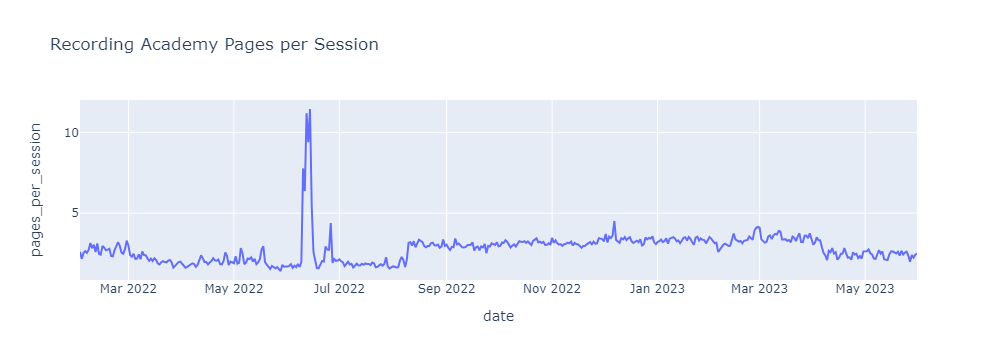

In [26]:
# rec_academy graph
px.line(data_frame=rec_academy, x='date', y='pages_per_session', title='Recording Academy Pages per Session')

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background :#FFF59E'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

The data shows that the websites have been performing slightly better now that they have split versus when they were combined. People are visiting more pages on each site per session, making both websites "stickier."

## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`


<span style='background :#FFF59E'>**Hint:** You will need use the `.sum()` function both in the `sum_bounced` and `sum_sessions` calculations. Don't forget to multiply by `100` so that the answer appears as a percentage instead of a decimal.</span>

In [28]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.
    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    
    return (100 * (sum_bounced / sum_sessions))




**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

A template for getting the function to work will look like code below. Remember that this is NOT the print statement, you will still need to add that part.

<span style='background :#FFF59E'>**Hint:** To get the bounce rate use `bounce_rate(frame)` </span>

```python
for frame in frames:
    my_value = my_function(frame)
```

<span style='background :#FFF59E'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` just before the end of the curly brackets but after your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [29]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
for frame in frames:
    my_br = bounce_rate(frame)
    print(f'Bounce rate is: {my_br:0.2f}')

Bounce rate is: 41.58
Bounce rate is: 33.67
Bounce rate is: 40.26


<span style='background :#DDD5F3'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**C.** Another useful metric is how long on average visitors are staying on the website.

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites.
Print each one using an f-string.

In [30]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.

for frame in frames:
    avg_duration = frame['avg_session_duration_secs'].mean()
    print(f'Average duration of session in seconds: {avg_duration:0.2f}')

Average duration of session in seconds: 102.85
Average duration of session in seconds: 128.50
Average duration of session in seconds: 86.61


**D.** What can you say about these two metrics as it relates to each of the websites?

The recoring academy site holds visitors for longer than the combined site or grammys site have.

# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [32]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [37]:
# preview the age_grammys file. the age_tra will look very similar.
age_grammys.head()

,age_group,pct_visitors,website
0,18-24,27.37,Grammys
1,25-34,24.13,Grammys
2,35-44,18.72,Grammys
3,45-54,13.57,Grammys
4,55-64,9.82,Grammys


In [38]:
age_tra.head()

,age_group,pct_visitors,website
0,18-24,27.12,Recording Academy
1,25-34,26.16,Recording Academy
2,35-44,19.55,Recording Academy
3,45-54,13.82,Recording Academy
4,55-64,8.24,Recording Academy


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [36]:
# create the website column
age_grammys['website'] = 'Grammys'
age_tra['website'] = 'Recording Academy'

**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<span style='background :#FFF59E'>**Hint:** Remember that you need to put your dataframe variables inside of a **list** first then pass that as your input of `pd.concat()`</span>

In [41]:
# use pd.concat to join the two datasets
age_df = pd.concat([age_grammys, age_tra])
age_df.shape

(12, 3)

<span style='background :#DDD5F3'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background :#FFF59E'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

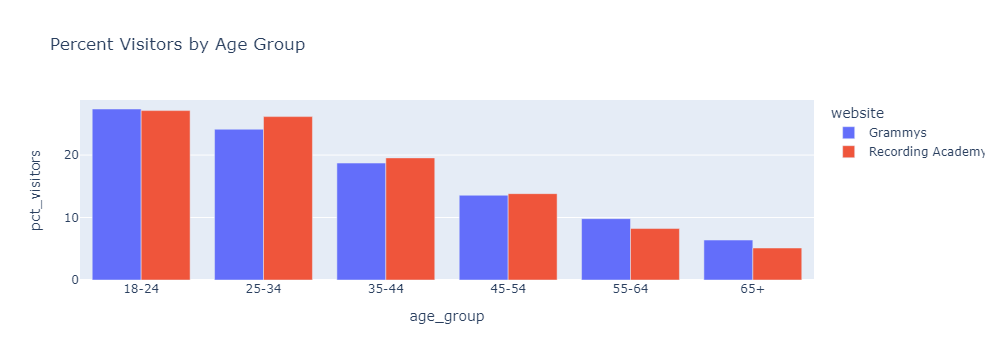

In [45]:
# Create bar chart

px.bar(age_df, x='age_group', y='pct_visitors', color='website', barmode='group', title = 'Percent Visitors by Age Group')

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The websites stay the same in demographics in the beginning bu the Recording Academy has more visitors in the 25-44 range and the Grammys have more in the 55+ range.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

From my analysis I think its in the best interest for both sites to remain separate. Looking as a visitor to each site, they provide different services from each other, the recording academy site being primarily business focused while the grammys are for awards, videos and music. The purposes of each site drive the metrics we have collected. As displayed in my initial graphs and analysis of the number of pages per session, neither site has taken an impact in user base since the split. They both perform well in their own functions and do not detract from one another.

Additonally, the sites both display around the same average visitor length. The recording academy pulls ahead by about 20s but this can be attributed to longer times from signups or voting choies. The demographics also show that each site gets about the same percentage in each age range with only small deviations. The site would do better by trying to provide longer engaging content so users may be on the site for longer than the average minute and a half. They could also boost their KPI in pages per session as it would help the engagement and stickiness of the website as well. I believe these support my claim that the sites should stay separate because they have developed their own user bases, and seem to be performing well on their own without detracting from one another, despite sharing mostly the same content. 

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [14]:
# Load in the data

desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [17]:
# preview the desktop_users file
desktop_users.head()

,date,visitors
0,2022-02-01,10195
1,2022-02-02,10560
2,2022-02-03,9935
3,2022-02-04,8501
4,2022-02-05,5424


In [18]:
# preview mobile_users file
mobile_users.head()

,date,visitors
0,2022-02-01,23494
1,2022-02-02,20234
2,2022-02-03,22816
3,2022-02-04,18592
4,2022-02-05,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [22]:
# change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns={'visitors':'desktop_visitors'})
mobile_users = mobile_users.rename(columns={'visitors':'mobile_visitors'})

In [16]:
# drop the segment column from each dataframe
desktop_users = desktop_users.drop(columns=['segment'])
mobile_users = mobile_users.drop(columns=['segment'])

**C.** Join the two dataframes together in a new variable called `segment_df`.

In [24]:
# join the two dataframes and preview the dataframe
segment_df = pd.merge(mobile_users, desktop_users, on='date', how='inner')

segment_df.head()

,date,mobile_visitors,desktop_visitors
0,2022-02-01,23494,10195
1,2022-02-02,20234,10560
2,2022-02-03,22816,9935
3,2022-02-04,18592,8501
4,2022-02-05,13298,5424


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [26]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']

To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [32]:
# filter and calculate the percentage share

df_filtered = segment_df[segment_df['date'] > '2023-03-31']
# df_filtered.head()
sum_desktop = df_filtered['desktop_visitors'].sum()
sum_mobile = df_filtered['mobile_visitors'].sum()
total_visitors = sum_desktop + sum_mobile

pct_share_desktop = (sum_desktop / total_visitors) * 100
pct_share_mobile = (sum_mobile / total_visitors) * 100

print(f'Total visitors:         {total_visitors}\n')
print(f'Total desktop visitors: {sum_desktop}\n')
print(f'Total mobile visitors:  {sum_mobile}\n')
print(f'Percent share desktop:  {pct_share_desktop:0.2f}\n')
print(f'Percent share mobile:   {pct_share_mobile:0.2f}\n')

Total visitors:         1428482

Total desktop visitors: 454782

Total mobile visitors:  973700

Percent share desktop:  31.84

Percent share mobile:   68.16



**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**

**What is the total number of visitors on the site during this timeframe?**

The total visitors during the timeframe was 1,428,482. The percentage of mobile users was 68.16% and desktop percentage was 31.84%. 

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

The Grammys are significantly outperforming its competitor, and the ratio of users is 38:1. The grammys also have the upper hand with a lower bounce rate. Despite this it still needs to improve on its average time per session and pages per session to compete better with its competitor.